<a href="https://colab.research.google.com/github/isaacebi/metaheuristic-optimization/blob/main/Metaheuristic_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#%% import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


### Score plot

In [28]:
def plot_converge(gwo_curve):
  
  x = np.arange(gwo_curve.shape[1])
  y = gwo_curve[0, :]
  plt.plot(x, y)
  plt.ylabel('Best score')
  plt.xlabel('Iteration')
  plt.show()

### Test Function

In [29]:
#%% Get_Functions
def get_function(F):
  
  # test function
  def F17(x):
      o = (x[:,1] - (x[:,0]**2) * 5.1 / (4 * (math.pi**2)) + 5 /math.pi * x[:,0] - 6) ** 2 + 10 * (1 - 1/(8*math.pi)) *math.cos(x[:,0]) + 10
      return o

  # select function
  if F == "F17":
      fobj = F17
      lb = np.array([-5, 0]).reshape(1,-1)
      ub = np.array([10, 15]).reshape(1,-1)
      dim = 2
      return [lb, ub, dim, fobj]

### Initilization agents

In [30]:
#%% Initialization
def initialization(search_agent, dim, ub, lb):
  
  # be sure to that ub, lb in 2d numpy array
  position = np.zeros((search_agent, dim))

  boundary_no = ub.shape[1]

  # if boundary equall
  if boundary_no == 1:
      position = np.random.rand(search_agent, dim) * (ub-lb) + lb

  if boundary_no > 1:
      for i in range(dim):
          ub_i = ub[:, i]
          lb_i = lb[:, i]
          position[:, i] = (np.random.rand(search_agent, 1) * (ub_i-lb_i) + lb_i).reshape(1,-1)

  return position

### Grey Wolf Optimizer

In [31]:
#%% GWO
def GWO(search_agent, max_iter, lb, ub, dim, fobj):

  # initialize alpha, beta, delta
  alpha_pos = np.zeros(dim)
  alpha_score = float('inf')

  beta_pos = np.zeros(dim)
  beta_score = float('inf')

  delta_pos = np.zeros(dim)
  delta_score = float('inf')

  # initialize the position of search agents
  position = initialization(search_agent, dim, ub, lb)

  # convergence curve
  convergence_curve = np.zeros(max_iter).reshape(1,-1)

  l = 0 # loop counter

  while l < max_iter:
      for i in range(position.shape[0]):

          # return back the search agent beyond the boundaries of search space
          flag4ub = position[i, :] > ub
          flag4lb = position[i, :] < lb
          position[i, :] = (position[i, :] * np.logical_not(flag4ub+flag4lb).astype(int)) + ub * flag4ub + lb * flag4lb

          fitness = fobj(position[i, :].reshape(1,-1))

          # update alpha, beta, and delta
          if fitness < alpha_score:
              alpha_score = fitness # update alpha
              alpha_pos = position[i, :].reshape(1,-1)

          if fitness > alpha_score and fitness < beta_score:
              beta_score = fitness
              beta_pos = position[i, :].reshape(1,-1)

          if fitness > alpha_score and fitness > beta_score and fitness < delta_score:
              delta_score = fitness
              delta_pos = position[i, :].reshape(1,-1)

      

      a = 2 - l * (2 / max_iter) # variable a decreases linearly fron 2 to 0

      # update the position of search agents including omega
      for i in range(position.shape[0]):
          for j in range(position.shape[1]):

              r1 = np.random.rand() # random number in [0,1]
              r2 = np.random.rand() # random number in [0,1]

              A1 = 2 * a * r1 - a # Equation (3.3)
              C1 = 2 * r2 # Equation (3.4)

              D_alpha = np.absolute(C1 * alpha_pos[:, j] - position[i, j]) # Equation (3.5)-part 1
              X1 = alpha_pos[:, j] - A1 * D_alpha # Equation (3.6)-part 1


              r1 = np.random.rand() # random number in [0,1]
              r2 = np.random.rand() # random number in [0,1]

              A2 = 2 * a * r1 - a # Equation (3.3)
              C2 = 2 * r2 # Equation (3.4)

              D_beta = np.absolute(C2 * beta_pos[:, j] - position[i, j]) # Equation (3.5)-part 2
              X2 = beta_pos[:, j] - A2 * D_beta # Equation (3.6)-part 2


              r1 = np.random.rand() # random number in [0,1]
              r2 = np.random.rand() # random number in [0,1]

              A3 = 2 * a * r1 - a # Equation (3.3)
              C3 = 2 * r2 # Equation (3.4)

              D_delta = np.absolute(C3 * delta_pos[:, j] - position[i, j]) # Equation (3.5)-part 3
              X3 = delta_pos[:, j] - A3 * D_delta # Equation (3.6)-part 3

              position[i, j] = (X1 + X2 + X3) / 3

      convergence_curve[:, l] = alpha_score
      l += 1
      

  return [alpha_score, alpha_pos, convergence_curve]

# Main Function

In [32]:
#%% Variables

# seed for repeatable results
seed_gen = 1234

# initialization for agent
search_agent = 30
function_name = 'F17'
max_iter = 100

# test function
[lb, ub, dim, fobj] = get_function(function_name)

# check lb, ub type
if not isinstance(lb, np.ndarray) or not isinstance(ub, np.ndarray):
    raise TypeError('Expected ub and lb to be in 2d numpy matrix')

## Using GWO

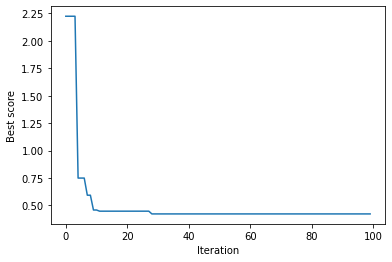

In [33]:
np.random.seed(seed_gen) # for repeatable results
[best_score, best_pos, gwo_curve] = GWO(search_agent, max_iter, lb, ub, dim, fobj)

plot_converge(gwo_curve)